# 1. Regression on California Housing Prices

Part 1 will examine a scikit-learn dataset on California housing statistics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing

Start by getting the dataset and dump everything into a variable `d`.

In [3]:
d = fetch_california_housing()

This returns a dictionary object. The keys tell us what segregated information is available.

In [4]:
print d.keys()

['data', 'feature_names', 'DESCR', 'target']


The `DESCR` key has information about the dataset.

In [5]:
print d.DESCR

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




The **target variable** is treated as a dependent variable, and is of interest in this dataset.

The **input variables** are treated as independent variables.

In [6]:
dframe = pd.DataFrame(d.data,
                      columns=d.feature_names)

**NOTE:** The target data is home values, and has dimensions of dollars(?)

In [7]:
dtarget = pd.Series(d.target)

In [8]:
data = {
    'target': dtarget,
    'input': dframe
}

## a. Univariate Distribution

A univariate distribution is like a histogram--it shows the frequency of values for a single variable.

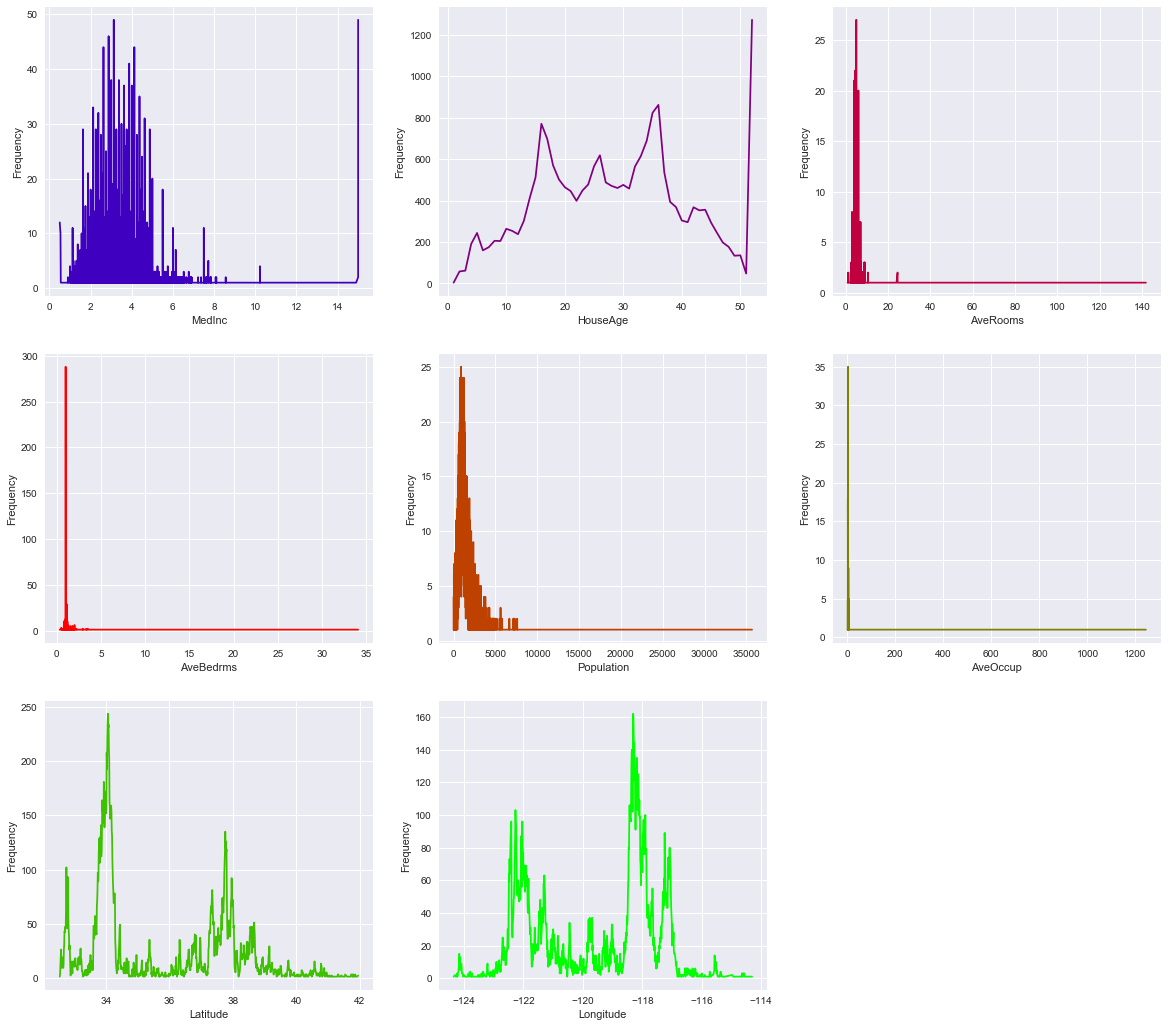

In [9]:
plt.style.use('seaborn')
plt.figure(0, figsize = (20, 50))

i = 0
for col in data['input'].columns:
    i += 1
    
    plt.subplot(data['input'].columns.size, 3, i)
    plt.plot(data['input'][col].value_counts().sort_index(), color = plt.cm.brg(i * 256 / 8))
    plt.xlabel(col)
    plt.ylabel("Frequency")

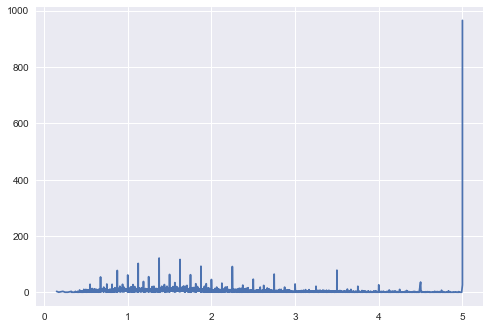

In [10]:
plt.figure(1)

plt.plot(data['target'].value_counts().sort_index())

The plots above basically demonstrate where there will be large quantities of data clumped together, and where data will be reasonably well spread out. `HouseAge`, for example, is quite well-distributed and will more likely reveal significant trends. In contrast, `AveOccup` is not well-distributed. Because most homes only have a few occupants, but some few homes have many occupants, there are some outlying data points that will make trends in the bulk of the data look less significant because of scale.

My guess is that the best way to address this is to omit outlying data, to get a better scale for the bulk of the data.

## b. Feature Dependency

For each of the input features, we visualize the target data's dependency on the feature data.

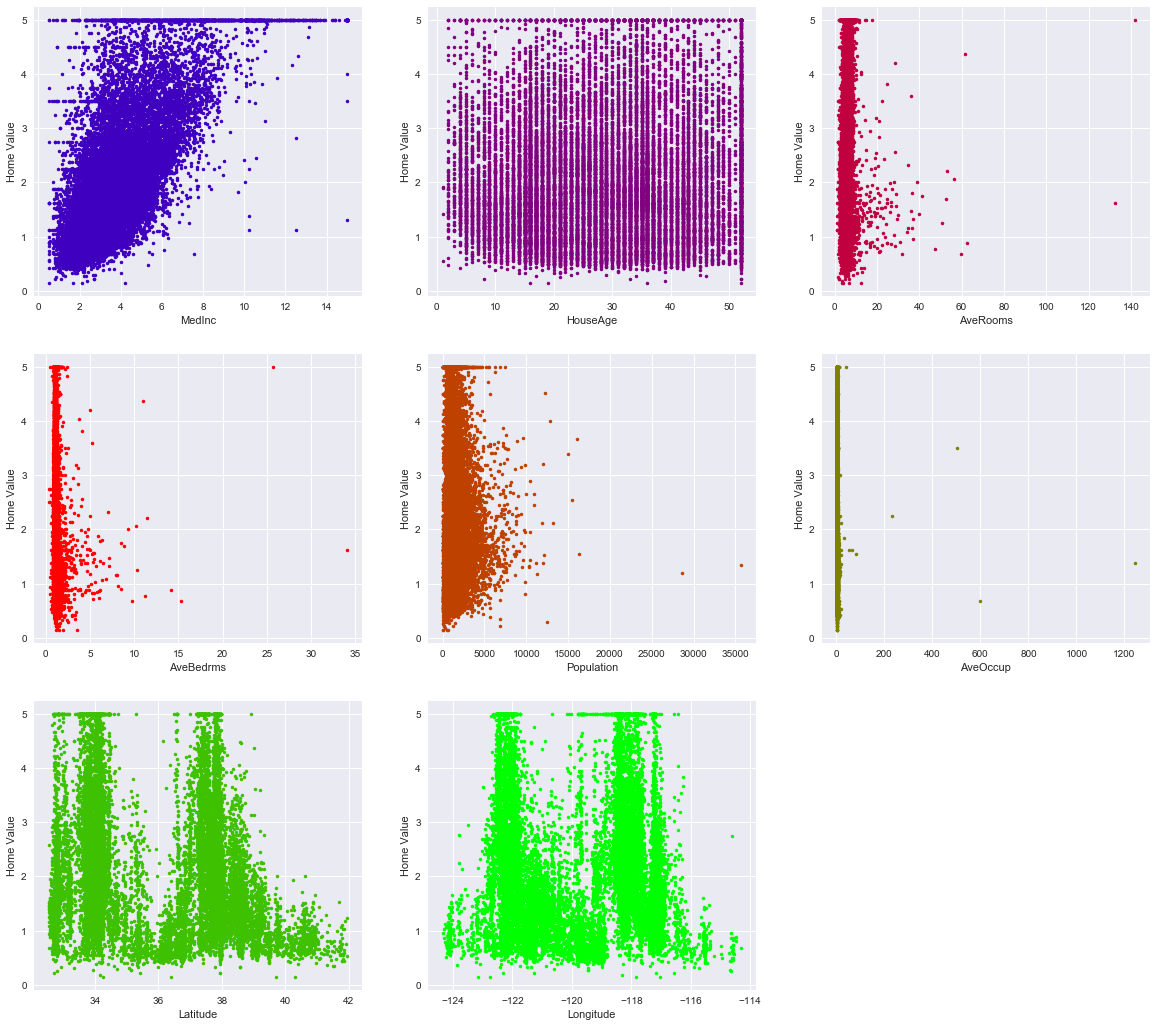

In [11]:
plt.figure(1, figsize = (20, 50))

# Subplot index
i = 0

# Plot each column of input features against the target data
for col in data['input'].columns:
    i += 1
    
    plt.subplot(data['input'].columns.size, 3, i)
    plt.plot(data['input'][col], 
             data['target'], 
             '.',
             color = plt.cm.brg(i * 256 / 8))
    plt.xlabel(col)
    plt.ylabel("Home Value")